# Practico Mentoria - Aprendizaje No Supervisado

El objectivo de este practico es realizar [Clustering](https://es.wikipedia.org/wiki/Algoritmo_de_agrupamiento) sobre el Dataset de las Caracteristicas de los jugadores.

De forma de juntar en los clusters a los jugadores con caracteristicas similares, y en particular de este practico analizar si estos clusters se corresponden con la posicion en la que juegan estos jugadores.
<h3><FONT COLOR="#FF0000"> Alumno: Flavio Olivier (Omega)</FONT></h3>

---

### Importaciones

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
#paquetería...

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [3]:
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [4]:
# Seteamos una semilla para Reproducibilidad
np.random.seed(1)

---

### Carga del Dateset

In [5]:
#daterio...

path = 'https://raw.githubusercontent.com/diplodatos2019mentoria/Aprendizaje_No_Supervisado/master/'

player_df = pd.read_csv(path + 'Datasets/football_player_full.csv', index_col = 'player_name')

print("Shape 'player_df' = {}".format(player_df.shape))

# Copy Dataframe
player2_df = player_df.copy(deep = False)


Shape 'player_df' = (9925, 36)


In [6]:
player2_df.sample(10)

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,position
player_name,,,,,,,,,,,,,,,,,,,,,
Ariel Borysiuk,66.12,74.38,56.92,49.79,49.38,67.25,58.88,64.08,45.79,52.38,...,49.21,51.58,63.58,63.08,12.71,13.04,18.71,15.54,13.04,MID
Sava Miladinovic Bento,58.00,64.43,51.07,44.86,42.93,58.14,46.21,58.29,50.64,52.86,...,49.50,41.64,46.57,40.07,8.00,8.00,8.00,7.00,14.00,MID
Dusan Tadic,78.16,81.88,81.52,68.36,56.64,78.60,69.84,81.36,79.72,73.08,...,76.28,39.96,35.56,27.56,10.16,10.16,12.56,8.16,15.16,MID
Samuel Souprayen,64.24,71.76,58.29,20.76,57.19,56.90,22.10,55.71,61.67,31.67,...,42.71,65.62,65.19,66.90,8.33,10.95,15.19,14.19,14.19,DEF
Daniele Croce,67.68,67.68,63.32,51.58,44.74,72.16,53.89,66.16,54.95,58.74,...,59.74,52.26,56.89,59.53,11.74,11.74,5.74,7.74,12.74,MID
John Arne Riise,76.32,77.64,84.00,60.82,67.05,78.32,75.05,69.41,74.05,77.55,...,70.59,75.45,79.59,80.59,13.27,10.09,33.14,13.50,13.68,DEF
Saidy Janko,62.13,76.53,58.73,40.60,56.73,51.20,34.27,67.07,41.73,36.27,...,51.20,58.53,65.87,64.60,5.27,9.27,7.27,13.27,7.27,DEF
Helder Postiga,76.04,76.93,59.33,71.19,78.19,64.56,78.56,73.56,65.81,52.85,...,70.59,25.37,28.11,27.19,12.00,9.81,20.67,16.37,14.59,FW
Denzel Slager,61.50,70.75,60.25,59.00,43.00,58.75,59.00,65.12,64.00,48.00,...,50.00,20.62,20.00,21.00,14.00,8.00,11.00,11.00,15.00,FW


In [7]:
player2_df.dtypes

overall_rating        float64
potential             float64
crossing              float64
finishing             float64
heading_accuracy      float64
short_passing         float64
volleys               float64
dribbling             float64
curve                 float64
free_kick_accuracy    float64
long_passing          float64
ball_control          float64
acceleration          float64
sprint_speed          float64
agility               float64
reactions             float64
balance               float64
shot_power            float64
jumping               float64
stamina               float64
strength              float64
long_shots            float64
aggression            float64
interceptions         float64
positioning           float64
vision                float64
penalties             float64
marking               float64
standing_tackle       float64
sliding_tackle        float64
gk_diving             float64
gk_handling           float64
gk_kicking            float64
gk_positio

In [8]:
# NO 

player2_position_list = player2_df.position.tolist()


In [9]:
player2_df = player2_df[[
    'overall_rating', 'potential', 'crossing', 'finishing', 'heading_accuracy',
    'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
    'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility',
    'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength',
    'long_shots', 'aggression', 'interceptions', 'positioning', 'vision',
    'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
    'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
]]

In [10]:
player2_df.dtypes

overall_rating        float64
potential             float64
crossing              float64
finishing             float64
heading_accuracy      float64
short_passing         float64
volleys               float64
dribbling             float64
curve                 float64
free_kick_accuracy    float64
long_passing          float64
ball_control          float64
acceleration          float64
sprint_speed          float64
agility               float64
reactions             float64
balance               float64
shot_power            float64
jumping               float64
stamina               float64
strength              float64
long_shots            float64
aggression            float64
interceptions         float64
positioning           float64
vision                float64
penalties             float64
marking               float64
standing_tackle       float64
sliding_tackle        float64
gk_diving             float64
gk_handling           float64
gk_kicking            float64
gk_positio

In [11]:
player2_df.sample(10)

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player_name,,,,,,,,,,,,,,,,,,,,,
Rolando Mandragora,60.93,73.13,47.87,44.33,48.07,69.33,41.67,60.07,49.67,33.67,...,65.07,31.67,46.67,57.00,52.73,12.67,13.67,8.67,13.67,15.67
Daniel Pinillos,59.71,66.14,59.57,32.14,48.14,48.29,33.14,52.29,57.57,39.14,...,43.86,46.14,57.86,63.57,70.43,6.14,15.14,10.14,12.14,6.14
Stopira,60.25,65.00,56.00,28.00,32.00,49.00,32.00,44.00,47.00,42.00,...,51.00,45.00,62.00,59.50,66.00,8.00,13.00,11.00,13.00,5.00
Kakha Kaladze,78.50,83.10,67.30,32.80,77.10,71.20,46.00,51.70,44.00,48.30,...,61.00,64.20,81.90,81.60,72.70,11.00,15.30,49.10,14.60,17.80
Sergi Darder,69.43,75.61,48.91,39.13,35.65,77.17,36.04,63.83,61.87,54.26,...,75.00,38.26,52.61,64.48,61.13,6.26,9.26,5.26,13.26,5.26
Zeljko Brkic,75.00,77.12,18.50,19.00,17.50,32.71,16.58,20.17,17.88,18.42,...,27.33,31.54,19.00,19.92,20.92,80.58,70.00,59.50,76.88,78.92
Stephen Elliott,66.50,70.93,52.79,67.14,65.64,59.79,61.14,64.21,52.00,47.71,...,64.93,63.43,32.50,31.43,25.00,13.57,10.79,22.79,9.29,9.43
Adil Ramzi,66.17,66.17,61.67,55.67,50.00,71.00,54.00,69.33,49.00,70.00,...,70.67,75.00,48.67,33.33,35.33,12.00,6.00,10.00,10.00,9.00
Igor Bubnjic,69.47,76.18,28.76,20.59,68.12,45.65,30.12,36.12,34.76,34.12,...,34.06,43.12,74.12,75.59,72.29,11.76,11.76,13.76,12.76,4.76


---

> ### Aplicar Clustering sobre las features de los jugadores

Usar [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) para el clustering.

Probar primero con 4 clusters, este numero se debe a cantidad de clases con respecto a la posicion de los jugadores:
* **GK**: Goalkeeper (Arquero)
* **DEF**: Defenser (Defensor)
* **MID**: Midfielder (Mediocampistas)
* **FW**: Forward (Delantero)

Luedo de hacer clustering, ver cuantos elementos tiene cada cluster.

In [12]:
# TODO

km_pred = KMeans(n_clusters = 4, random_state = 42).fit_predict(player2_df)
km_pred


array([0, 3, 2, ..., 0, 3, 2])

In [13]:
#resultó algo así...

pd.concat([player_df['position'].reset_index(), pd.DataFrame(km_pred, columns = ['cluster'])], axis = 1).set_index('player_name')


,position,cluster
player_name,,
Aaron Appindangoye,DEF,0
Aaron Cresswell,DEF,3
Aaron Doran,MID,2
Aaron Galindo,DEF,0
Aaron Hughes,DEF,0
Aaron Hunt,MID,2
Aaron Kuhl,MID,0
Aaron Lennon,MID,2
Aaron Lennox,GK,1


In [14]:
#side by side...
from IPython.display import display_html

def siamesas(*args):
    html_str = ''
    spaciador = '<table style="min-width: 30px !important;"><tr style="min-width: 30px !important; background:none !important;"><td style="min-width: 30px !important;"></td></tr></table>'
    for df in args:
        html_str += df.to_html() + spaciador
        
    display_html(html_str.replace('table', 'table style = "display:inline"'), raw = True)


In [15]:
#clases originales...
#... y predichas.

siamesas(pd.DataFrame(player_df.position.value_counts()), pd.DataFrame(pd.DataFrame(km_pred, columns = ['cluster']).cluster.value_counts()))


position 
 
 
 
 
 DEF 
 3664 
 
 
 MID 
 3473 
 
 
 FW 
 1919 
 
 
 GK 
 869 
 
 
 
 
 
 
 cluster 
 
 
 
 
 2 
 3506 
 
 
 3 
 2877 
 
 
 0 
 2673 
 
 
 1 
 869

> ##### Evaluar resultados

Evaluar los resultados del clustering usando una medida como la [Pureza](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html).


**Hint 1**: Puede que en los clusters haya confusion entre las distintas posiciones dentro del campo de juego, esto no esta mal. Ya que hay que recordar que las posiciones estan simplicadas.


**Hint 2**: Un indicador de mala calidad es que haya clusters muy chiquitos y uno muy grande, lo cual indica que en el espacio no se distinguen bien grupos separados y hay que usar otro espacio.

In [16]:
#purity...
from sklearn import metrics

contingency_matrix = metrics.cluster.contingency_matrix(player_df['position'].values, km_pred)
print(contingency_matrix)
print()
print('Purity: {}'.format(contingency_matrix.max(axis = 1).sum() / contingency_matrix.sum()))


[[2417    0    0 1247]
 [   3    0 1881   35]
 [   0  869    0    0]
 [ 253    0 1625 1595]]

Purity: 0.6843324937027708


In [17]:
#normalized mutual information or NMI...
from sklearn.metrics.cluster import normalized_mutual_info_score

print('NMI: {}'.format(normalized_mutual_info_score(player_df['position'].values, km_pred)))


NMI: 0.5629166802850829


In [18]:
#rand index score...
from sklearn.metrics.cluster import adjusted_rand_score

print('Rand index: {}'.format(adjusted_rand_score(player_df['position'].values, km_pred)))


Rand index: 0.4033761167152728


> ### Diferentes numero de clusters

Usar diferentes numero de clusters, especialmente numeros altos, para observar las subdivisiones de las clases, y que clases se confunden mas.


**Nota**: Las posiciones asignadas a los jugadores son simplificadas, esto quiere decir que al hacer mas de 4 clusters podemos llegar descubrir posiciones mas especificas dentro del campo de juego (por ejemplo: Defensor central, Lateral derecho/izquierdo, Mediocampista defensivo/ofensivo, etc.)


**Recordar**: Calcular la Pureza para analizar si tener una mayor cantidad de clusters da mejores resultados.

In [29]:
#purezas...

for bucle in range(2, 10):
    km_pred = KMeans(n_clusters = bucle, random_state = 42).fit_predict(player2_df)
    km_pred
    contingency_matrix = metrics.cluster.contingency_matrix(player_df['position'].values, km_pred)
    print('Purity para k={}: {}'.format(bucle, contingency_matrix.max(axis = 1).sum() / contingency_matrix.sum()))
    

Purity para k=2: 1.0
Purity para k=3: 0.8798992443324937
Purity para k=4: 0.6843324937027708
Purity para k=5: 0.5802518891687657
Purity para k=6: 0.4738539042821159
Purity para k=7: 0.469823677581864
Purity para k=8: 0.39476070528967255
Purity para k=9: 0.374911838790932


> ### Subconjunto de Features

Probar diferentes subconjunto de caracteristicas del dataset para analizar si los resultados mejoran.

Por ejemplo, probar con el siguiente subconjunto de caracteristicas:
* `gk_diving`
* `gk_handling`
* `gk_kicking`
* `gk_positioning`
* `standing_tackle`
* `sliding_tackle`
* `short_passing`
* `vision`
* `finishing`
* `volleys`

Tambien probar con otros subconjuntos.


**Recordar**: Calcular la Pureza

In [32]:
#subset...

player3_df = player2_df[['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'standing_tackle',
                         'sliding_tackle', 'short_passing', 'vision', 'finishing', 'volleys']]
player3_df.dtypes


gk_diving          float64
gk_handling        float64
gk_kicking         float64
gk_positioning     float64
standing_tackle    float64
sliding_tackle     float64
short_passing      float64
vision             float64
finishing          float64
volleys            float64
dtype: object

In [33]:
#ejecutamos KMeans...

k = 4
km_pred = KMeans(n_clusters = k, random_state = 42).fit_predict(player3_df)

contingency_matrix = metrics.cluster.contingency_matrix(player_df['position'].values, km_pred)
print('Purity para k={}: {}'.format(k, contingency_matrix.max(axis = 1).sum() / contingency_matrix.sum()))


Purity para k=4: 0.7182871536523929


> ### Uso de Embedding

Aplicar el uso de embeddings, por ejemplo [PCA](https://es.wikipedia.org/wiki/PCA), para comparar que sucede en ese espacio en comparacion con lo que sucede en el espacio original.

In [48]:
#embedding sobre data total...
from sklearn.preprocessing import StandardScaler

X = player2_df.values
y = player_df['position'].values

#estandarizamos X...
X = StandardScaler().fit_transform(X)

#PCA...
pca = PCA(n_components = 2)
PrincipalComponents = pca.fit_transform(X)

#display(pd.DataFrame(PrincipalComponents, columns = ['PC_1', 'PC_2']))

#Kmeans sobre PCA...
km_pred = KMeans(n_clusters = 4, random_state = 42).fit_predict(PrincipalComponents)

contingency_matrix = metrics.cluster.contingency_matrix(player_df['position'].values, km_pred)
print(contingency_matrix)
print()
print('Purity: {}'.format(contingency_matrix.max(axis = 1).sum() / contingency_matrix.sum()))


[[   5    0 2364 1295]
 [1844    0   32   43]
 [   0  869    0    0]
 [1833    0  280 1360]]

Purity: 0.6962216624685138


#### mejora algunas décimas...

In [49]:
#embedding sobre subset...

X = player3_df.values
y = player_df['position'].values

#estandarizamos X...
X = StandardScaler().fit_transform(X)

#PCA...
pca = PCA(n_components = 2)
PrincipalComponents = pca.fit_transform(X)

#display(pd.DataFrame(PrincipalComponents, columns = ['PC_1', 'PC_2']))

#Kmeans sobre PCA...
km_pred = KMeans(n_clusters = 4, random_state = 42).fit_predict(PrincipalComponents)

contingency_matrix = metrics.cluster.contingency_matrix(player_df['position'].values, km_pred)
print(contingency_matrix)
print()
print('Purity: {}'.format(contingency_matrix.max(axis = 1).sum() / contingency_matrix.sum()))


[[   0  814    0 2850]
 [1871   48    0    0]
 [   0    0  869    0]
 [1540 1780    0  153]]

Purity: 0.7425692695214106


#### mejora unos puntos...

Para n_clusters = 2 El silhouette_score promedio es : 0.7496035117026993
Para n_clusters = 3 El silhouette_score promedio es : 0.5851505877728135
Para n_clusters = 4 El silhouette_score promedio es : 0.5174570129637843
Para n_clusters = 5 El silhouette_score promedio es : 0.4546350856569354
Para n_clusters = 6 El silhouette_score promedio es : 0.4253970573221955
Para n_clusters = 7 El silhouette_score promedio es : 0.3988955761606965
Para n_clusters = 8 El silhouette_score promedio es : 0.389450353886547
Para n_clusters = 9 El silhouette_score promedio es : 0.3914018774125045


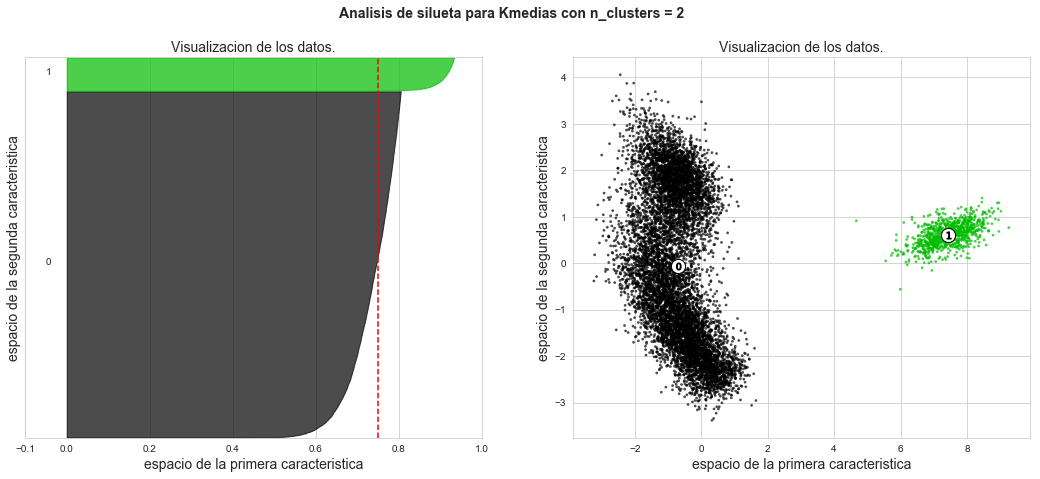

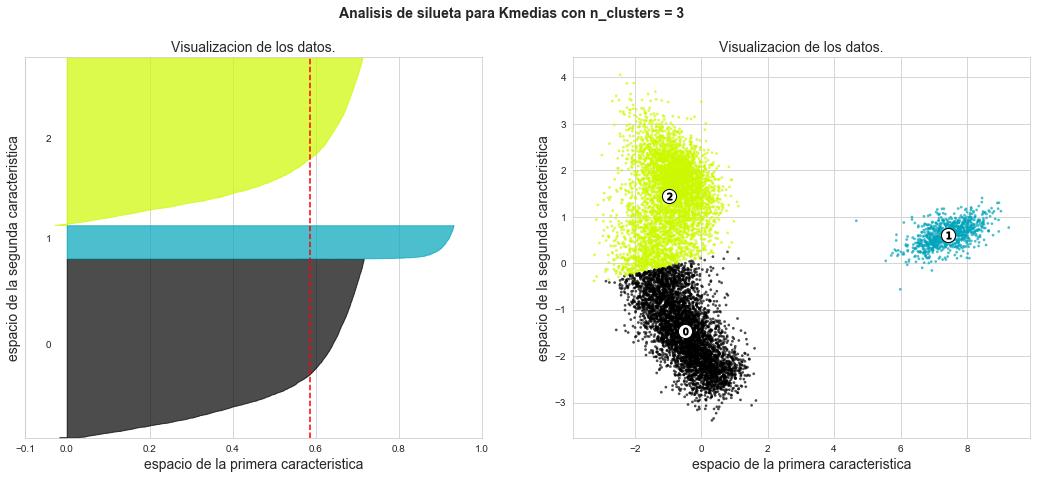

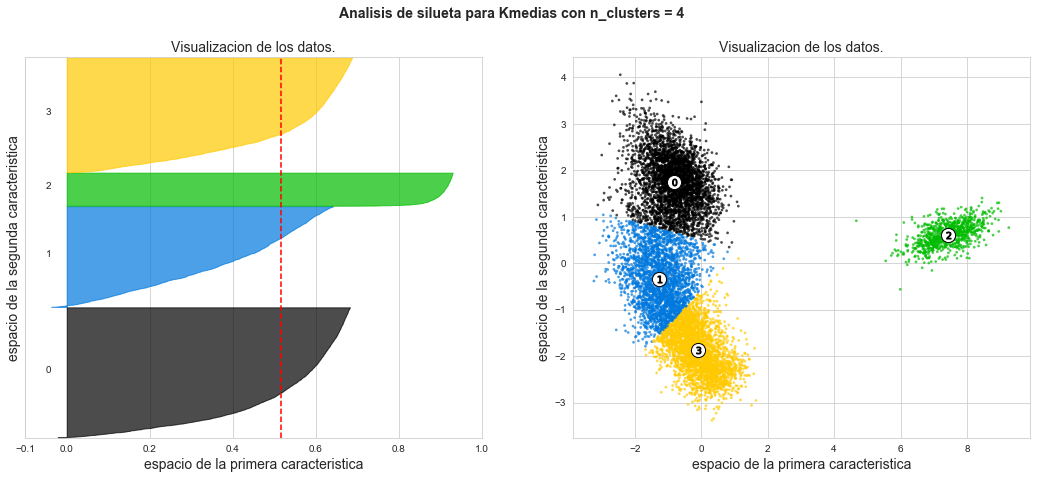

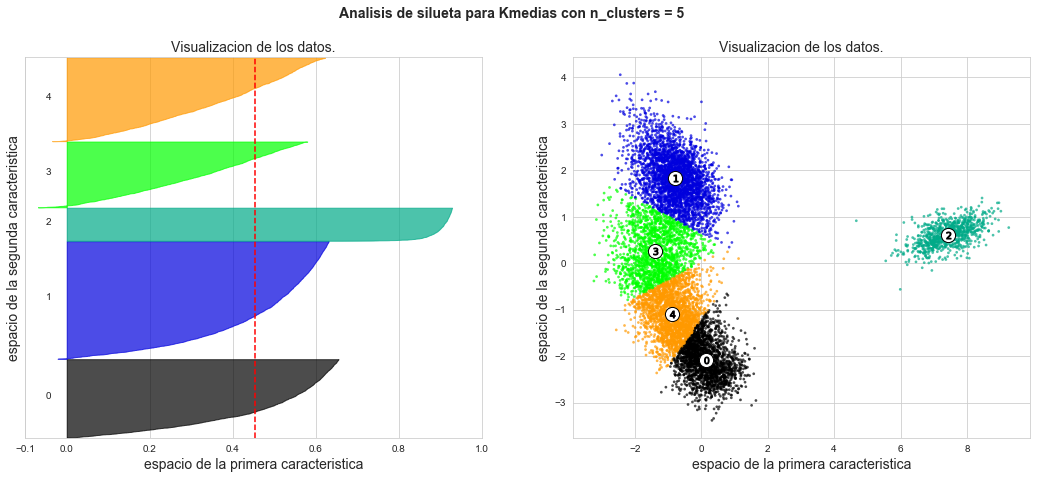

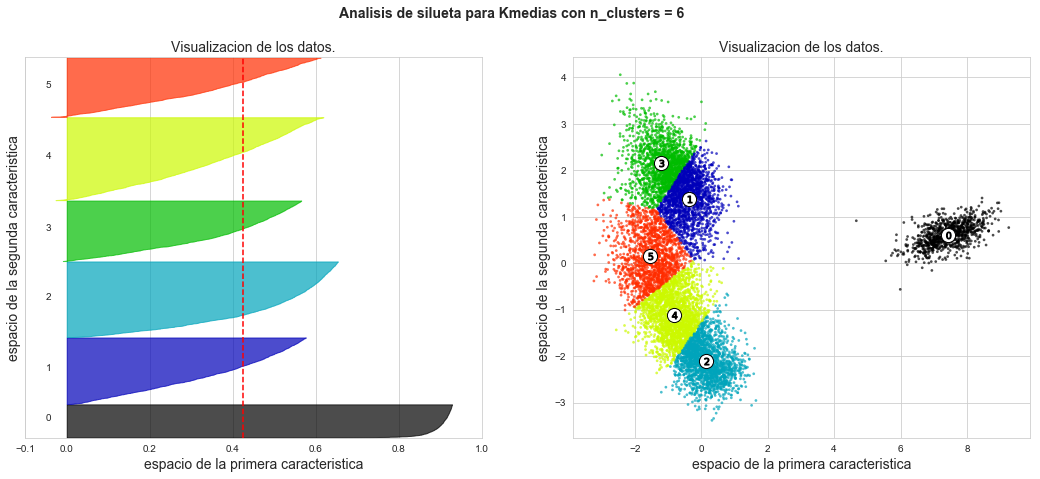

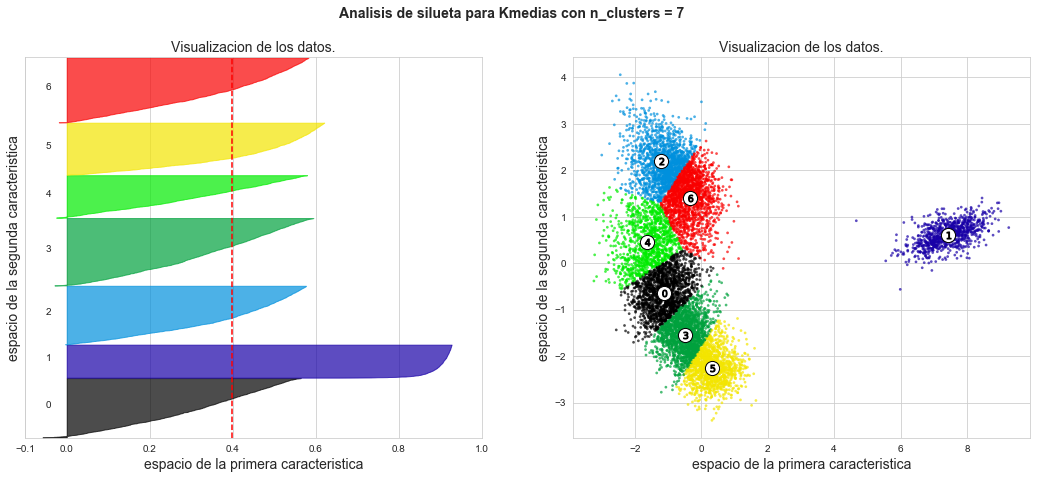

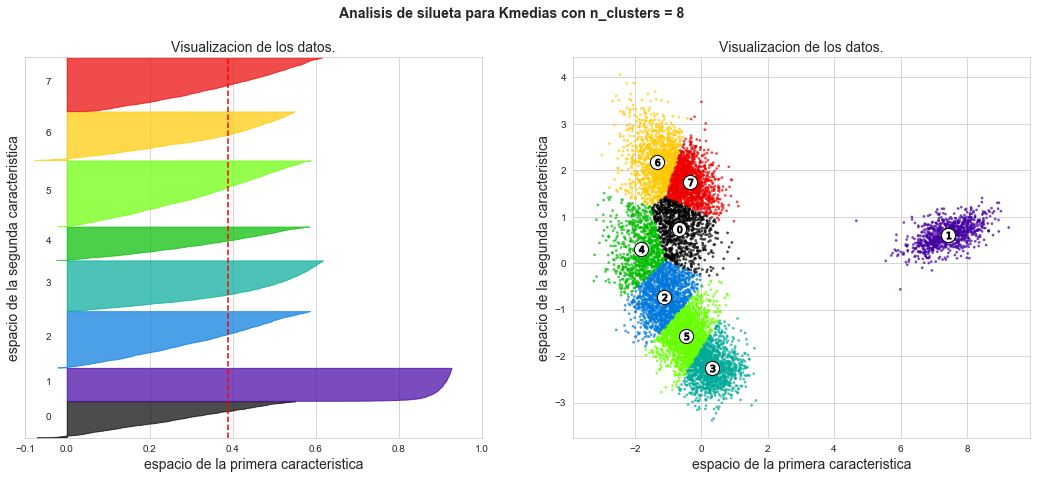

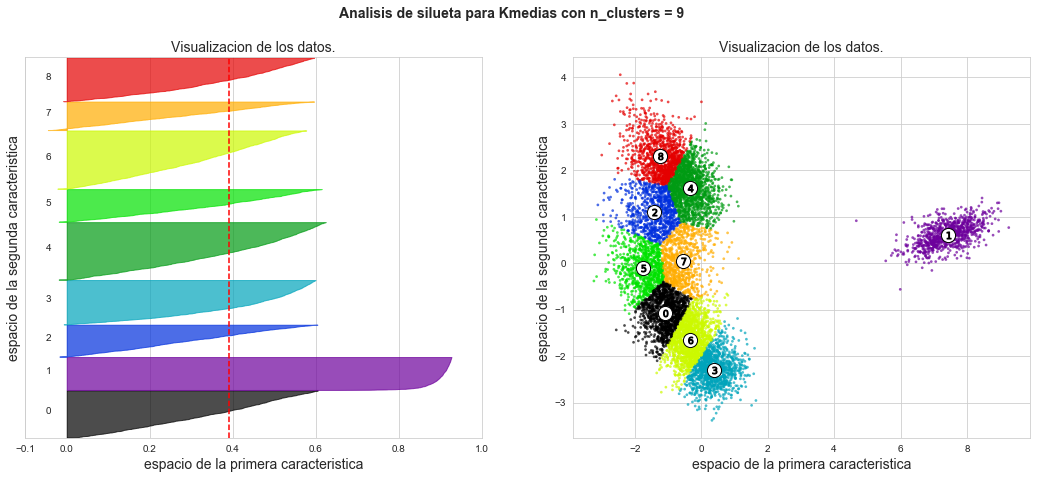

In [53]:
#aplicamos silhouette sobre el embedding del subset y observamos...
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X = PrincipalComponents.copy()
range_n_clusters = 10
sse = {}
for n_clusters in range(2, range_n_clusters):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters = n_clusters, random_state = 42)
    cluster_labels = clusterer.fit_predict(X)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print('Para n_clusters =', n_clusters, 'El silhouette_score promedio es :', silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor = color, edgecolor = color, alpha = 0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title('Visualizacion de los datos.', fontsize = 14)
    ax1.set_xlabel('espacio de la primera caracteristica', fontsize = 14)
    ax1.set_ylabel('espacio de la segunda caracteristica', fontsize = 14)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x = silhouette_avg, color = 'red', linestyle = '--')

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker = '.', s = 30, lw  =0, alpha = 0.7,
                c = colors, edgecolor = 'k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker = 'o',
                c = 'white', alpha = 1, s = 200, edgecolor = 'k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker = '$%d$' % i, alpha = 1,
                    s = 50, edgecolor = 'k')

    ax2.set_title('Visualizacion de los datos.', fontsize = 14)
    ax2.set_xlabel('espacio de la primera caracteristica', fontsize = 14)
    ax2.set_ylabel('espacio de la segunda caracteristica', fontsize = 14)

    plt.suptitle(('Analisis de silueta para Kmedias '
                  'con n_clusters = %d' % n_clusters),
                 fontsize = 14, fontweight = 'bold')
    #plt.savefig("kmeans_%d" % n_clusters, dpi=300)

plt.show()


---

**Comunicación de Resultados**

Se pide que toda esta información no quede plasmada solamente en un Jupyter Notebook, sino que se diagrame una comunicación en formato textual o interactivo (Google Docs, PDF o Markdown por ejemplo).

La comunicación debe estar apuntada a un público técnico pero sin conocimiento del tema particular, como por ejemplo, sus compañeros de clase.